## Legal Language: Mr Bruff in *The Moonstone*
Murray Eiland
13 August 2022

- Introduction to Computational Literary Analysis
- Department of Digital Humanities, University of California, Berkeley
- Instructor: Jonathan Reeve

William Wilkie Collins (1824 –1889) is credited with writing the first modern detective novel in English. Of course at the time he did not know the genre and he was not aware he was a pioneer. Today his work might not be seen as detective fiction (Ashley 60). His book *The Moonstone* (1868), features a London based Solicitor, Mr.  Mathew Bruff, who contributes one of the narratives of the book. This is interesting because Collins was called to the bar in 1851 (he was a Barrister and not a Solicitor, both still lawyers). He apparently did not find it congenial, and he never took on formal clients.  
His good friend and mentor Charles Dickens (1812 – 1870) worked as a junior clerk in a law office for over a year and became a freelance reporter at Doctors' Commons for nearly four years. A case could be made that despite not being a qualified lawyer, the senior mentor Dickens helped Collins write about legal issues. While that issue might be hard to resolve, the issue of how the character of Mr. Bruff uses legal language is easier to explore. Special attention will be paid to comparisons with other narratives in *The Moonstone*. Visualizations are specifically labelled with numbers.  
At the end of the presentation, some conclusions are suggested about how Collins viewed the legal profession. 

### IMPORT CELL BELOW

In [66]:
import nltk 
from nltk.corpus import brown
from collections import Counter
import pandas as pd
import requests
import json  
import sklearn
import sklearn.decomposition
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from matplotlib import pyplot as plt   
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
Moonstone = open("./moonstone.md.txt", encoding="utf-8").read()
plt.rcParams['figure.figsize'] = [10, 5]
from itertools import combinations 
import networkx 


### Corpus of *The Moonstone*: Dictionary with Labels as the Keys


The Corpus DB text was already cleaned of material front and back (paratext). The DB text did not use ## to mark chapters, but did use headings in ALL CAPS. These headings were used as boundaries. I also had to get rid of blank lines to clean up the CDB text.  

In [67]:
response = requests.get("http://corpus-db.org/api/id/155.0/fulltext")
Moonstone = response.json()[0]["text"]
 
narrativeBoundaries = {
    "Betteredge": [("The events related by GABRIEL BETTEREDGE", "SECOND PERIOD"),
                   ("Contributed by GABRIEL BETTEREDGE", "EPILOGUE")],
    "Clack": [("Contributed by MISS CLACK", "SECOND NARRATIVE")],
    "Bruff": [("Contributed by MATHEW BRUFF", "THIRD NARRATIVE")],
    "Blake": [("Contributed by FRANKLIN BLAKE", "FOURTH NARRATIVE"),
              ("The Story Resumed by FRANKLIN BLAKE", "SIXTH NARRATIVE")],
    "Jennings": [("Extracted from the Journal of EZRA JENNINGS", "FIFTH NARRATIVE")],
    "Cuff": [("Contributed by SERGEANT CUFF", "SEVENTH NARRATIVE")],
    "Candy": [("In a Letter from MR. CANDY", "EIGTH NARRATIVE")],
}

moonstoneNarrators = {}

for narrator in narrativeBoundaries:
    moonstoneNarrators[narrator] = ""
    for appearance in narrativeBoundaries[narrator]:
        start = Moonstone.find(appearance[0])
        end = Moonstone.find(appearance[1])
        moonstoneNarrators[narrator] += Moonstone[start:end]


There are a total of eleven different narrators, who tend to have a different styles of writing. Mr. Bruff’s narrative is one of the shortest, but his contribution is given much weight. Mr. Bruff (who has a name reminiscent of “brusque” and “rough”) approaches his narrative in a very precise way, and at least once prides himself in having no imagination.  Far from what his name might indicate, he is neither impolite nor abrupt, but he is direct. However, some metrics show that his text is broadly similar to that of the other narrators.  Mr. Bruff’s name is clearly related to Sgt. Cuff’s name, which is considered later.

Mr. Franklin Blake, Lady Verinder's nephew, has the second longest narrative. He is a suspect in the theft of the diamond, and his narrative seems unfocussed. While his last name is superficially like “Bruff” the characters are not easily confused. Franklin is apparently happy to be addressed by his first name. Mr Bruff is not. Blake is, according to the “book account,” compiling and editing this novel. As he states in the beginning: “We have certain events to relate… and have certain persons concerned in those events who are capable of relating them.  Starting from the plain facts, the idea is that we should all write the story of the Moonstone in turn---as far as our own personal experience extends, and no farther.” This is interesting as in letters, Dickens apparently warned Collins not to speak for his characters, and to let them reveal themselves through dialog and action (Booth 135). Gabriel Betteredge is commissioned by Blake to start the story because of his unique position as steward of the Verinder household. Betteredge has the longest narrative in the book. He holds many opinions, some of them quite wrong, and states them frequently.  He enjoys reading the book Robinson Crusoe, which might be a reference to Blake’s education overseas. 

Sergeant Cuff is a famous detective who is called out of retirement. It seems that Collins is alluding to putting handcuffs on someone by this last name, as well as suggesting a connection with Mr. Bruff. In fact, the book makes it clear that Cuff is too eager to raise unfounded accusations. His character is far from the hero of the novel, and he is dismissed from the case by Lady Verinder (he was on the wrong track). He notes: “It's only in books that the officers of the detective force are superior to the weakness of making a mistake.” The trope of incompetent local police would of course be used many times since, but at the time it may have been a shock to see the police in that light. After the departure/displacement of the police it is the “amateurs” Bruff and Blake who carry the narrative (Miller 158). It is notable that Bruff uses far more amenable methods of questioning than Cuff, and as a result gathers much more useful information. 

Cuff’s narrative is the second shortest, next to Mr Candy’s.  Mr Candy, the local doctor, becomes ill following Miss Verinder’s birthday party and suffers from memory loss for the rest of the novel.  His is the shortest and least typical narrative. Miss Drusilla Clack, niece to Lady Verinder, is an evangelical Christian who admires Godfrey Ablewhite and rather enjoys arguing with Mr Bruff.  Miss Clack's has a rather self-satisfied tone, and her narrative appears to be very different from the others just from a surface reading. Ezra Jennings’s (Mr. Candy’s assistant) contribution is unlike the other narrations. His is a journal written at the time of the events. He is dying and uses opium, which contributes to the strange the unique nature of his narrative. Some commentators suggest that Jennings could be the character that Collins (also an opium addict) most related to, but this is difficult to demonstrate. 


### Length of Each Narrative in *The Moonstone*  
The punctuation has been filered out to leave words. 

In [68]:
def counted(textString):
    lowered = textString.lower()
    tokens=nltk.word_tokenize(lowered)
    remove = ['.', '!', '(', ')', '?', ',', "’", "“", "”", "*","#"]
    tokens = [token for token in tokens if token not in remove]
    return len(tokens)

allCounts = {key: [counted(value)] for key, value in moonstoneNarrators.items()}
counts_df = pd.DataFrame(allCounts)
counts_df


,Betteredge,Clack,Bruff,Blake,Jennings,Cuff,Candy
0,84644,32332,10888,54643,15479,4538,3967


### Percent of Adverbs used by Narrators

In [69]:
moonstoneAdverbProportions = {}
moonstoneAdverbs = {}
for narrator in moonstoneNarrators:
    words = nltk.word_tokenize(moonstoneNarrators[narrator])
    word_count = len(words)
    adverb_list = []
    for word in words:
        synsets = nltk.corpus.wordnet.synsets(word)
        if len(synsets) != 0 and synsets[0].pos() == 'r':
            adverb_list.append(word)
            
            
    moonstoneAdverbProportions[narrator] = [len(adverb_list) / word_count * 100] #convert to percent
    moonstoneAdverbs[narrator] = adverb_list[0:10] 
    
print(moonstoneAdverbProportions)
print(moonstoneAdverbs)

moonstone_adv_df = pd.DataFrame(moonstoneAdverbProportions)
moonstone_adv_df 


{'Betteredge': [2.978568456096546], 'Clack': [3.5804020100502516], 'Bruff': [2.9243119266055047], 'Blake': [3.1338153756363285], 'Jennings': [3.226725956330882], 'Cuff': [3.0291411042944785], 'Candy': [2.67639902676399]}
{'Betteredge': ['by', 'though', 'too', 'before', 'before', 'rightly', 'Not', 'yet', 'always', 'too'], 'Clack': ['by', 'carefully', 'before', 'invariably', 'invariably', 'invariably', 'by', 'but', 'before', 'hitherto'], 'Bruff': ['by', 'hardly', 'personally', 'unquestionably', 'afterwards', 'therefore', 'along', 'oddly', 'perhaps', 'rather'], 'Blake': ['by', 'recently', 'before', 'again', 'not', 'By', 'by', 'seriously', 'actually', 'never'], 'Jennings': ['But', 'entirely', 'not', 'never', 'again', 'hideously', 'before', 'possibly', 'Exactly', 'by'], 'Cuff': ['by', 'by', 'by', 'not', 'before', 'beyond', 'immediately', 'by', 'by', 'partly'], 'Candy': ['not', 'expressly', 'not', 'bitterly', 'before', 'by', 'fervently', 'again', 'But', 'afterwards']}


,Betteredge,Clack,Bruff,Blake,Jennings,Cuff,Candy
0,2.978568,3.580402,2.924312,3.133815,3.226726,3.029141,2.676399


In considering the narrators individually regarding their use of adverbs, some important trends emerge. An adverb is typically a modifier of a verb, an adjective, or another adverb. It is often associated with action in a text, expressing quality, place, time, degree, or number.  As a general rule, good science writing is said not to use many adverbs, whereas the humanities use more. 

An analysis of the texts of the narrators of *The Moonstone* shows there is a small range around a mean.  Betteredge and Bruff are about the same, while Candy is at the bottom end, and the vigorously evangelical Clack is at the top end of the scale. This might be some indication of how the testimony of women would be regarded in Victorian society. Collins also explored legal issues in his book *The Woman in White*. Here, as in *The Moonstone*, he delved into issues of witness credibility and testimonial evidence. Not surprisingly, Victorian class consciousness favored upper class credibility, with the exception of women, who no matter what they class, might be regarded as unreliable (Finley 1).

More sensitive methods of analysis must be used to draw a line between Bruff and the other narrators. 


### 1A. Comparative Stylometric Analysis 

C:\Users\Murray\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


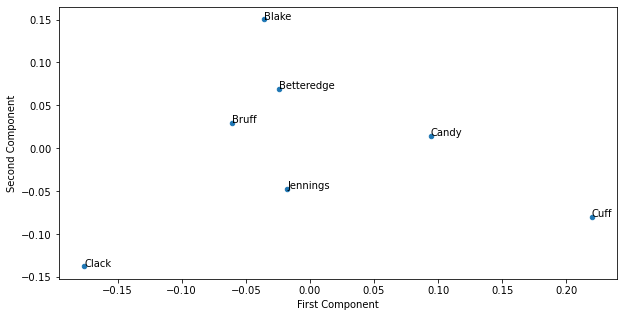

In [70]:
def frequent_words(textString):
    lowered = textString.lower()
    tokens=nltk.word_tokenize(lowered)
    
    remove = ['.', '!', '(', ')', '?', ',', "’", "“", "”", "*","#"]
    tokens = [token for token in tokens if token not in remove]
    
    sorted_tokens = sorted(set(tokens), key=tokens.count, reverse=True)
    
    return " ".join([token for token in tokens if token in tokens[100:800]])

frequentMoonstone = {key: frequent_words(value) for key, value in moonstoneNarrators.items()}
tfidfVectorizer = TfidfVectorizer(min_df=1, max_features=800, use_idf=False)
MoonstoneFreq = tfidfVectorizer.fit_transform(list(frequentMoonstone.values())).todense()

pca = sklearn.decomposition.PCA(n_components=2)
reduced=pca.fit_transform(MoonstoneFreq)

df = pd.DataFrame(reduced, columns=['First Component', 'Second Component'], index=list(frequentMoonstone.keys()))
ax = df.plot(kind='scatter', x='First Component', y='Second Component')
for narrator, points in df.iterrows():
    ax.annotate(narrator, points)

plt.show()


Mr. Bruff is not regarded as a prime suspect of the theft, and he acts as a lawyer/advisor for the Verinders, as well as Sir John Herncastle and Franklin Blake. Bruff’s observations are far more reliable that Cuff’s, as the lawyer introduces the possibility of money playing a significant role in motivating Rachel’s suitors (particularly Ablewhite). Collins’ other works follow the same pattern. Lawyers are presented as respectable and trusted advisors, while marriage, if it is mentioned, is regarded as an outmoded institution. Collins pushed for legal reforms to marriage in many of his works (Maceachen 121-122). Here we can draw a bright line between Collins and Dickens, as the latter was highly skeptical of lawyers (as in *Bleak House*). 

Mr. Bruff’s narrative fills in some gaps left by Clack. Mr. Bruff executes Sir John’s will and he is also informed that Lady Verinder’s will was requested at Doctor’s Commons by Ablewhite. Bruff warns Rachel of what he thinks about Ablewhite’s motives.  Mr. Bruff's narrative is roughly similar to Betteredge's, based on a surface reading. Also like Betteredge, Mr. Bruff feels almost a parent's affection for both Rachel and Blake. 

With this in mind, the stylometric analysis using syntactic words can be interpreted. The chart above is a presentation of the top 800 words barring the most frequently used words at the apex of the list (1-100). These words at the top of the frequency scale were not diagnostic of the narrator. Some recent studies (López-Escobedo *et al.* 610) have shown that stylometric analysis can be highly dependent upon text length. Specific variables might be useful for some authors and not others, even in similar corpora. 
 The results show that according to the parameters of the analysis, the evangelical Clack and the blundering Cuff are far distant outliers, while Bruff and Betteredge form a very loose grouping. This shows something about the style used by these authors which is easily understandable even from a casual reading of the text. Interestingly, Jennings, Candy, and Blake are about equidistant from Bruff according to this plot.  
 
The error message states that np.matrix is no longer ideal but it can still be used.


### 1B. Stylometric Analysis: Semantic rather than Syntactic Words
Words 800-2000 (only those that occurred in every narrator's text) were considered in this plot, which can be easily compared to the plot above. 

C:\Users\Murray\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


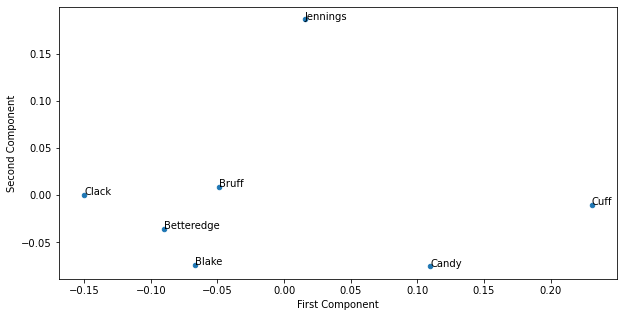

In [71]:
def other_words(textString):
    lowered = textString.lower()
    tokens=nltk.word_tokenize(lowered)
    
    remove = ['.', '!', '(', ')', '?', ',', "’", "“", "”", "*","#"]
    tokens = [token for token in tokens if token not in remove]
    
    sorted_tokens = sorted(set(tokens), key=tokens.count, reverse=True)
    
    return " ".join([token for token in tokens if token in tokens[800:2000]])


otherMoonstone = {key: other_words(value) for key, value in moonstoneNarrators.items()}
tfidfVectorizer = TfidfVectorizer(min_df=1, max_features=800, use_idf=False)
MoonstoneFreq = tfidfVectorizer.fit_transform(list(otherMoonstone.values())).todense()

pca = sklearn.decomposition.PCA(n_components=2)
reduced=pca.fit_transform(MoonstoneFreq)

df = pd.DataFrame(reduced, columns=['First Component', 'Second Component'], index=list(otherMoonstone.keys()))
ax = df.plot(kind='scatter', x='First Component', y='Second Component')
for narrator, points in df.iterrows():
    ax.annotate(narrator, points)

plt.show()



The information plotted here is different from the stylometric analysis above (syntactic words). In this plot, we see a different scatter of points based on semantic words. 
Here, Bruff’s text is about as related to Betteredge’s as well as the more distant Clack’s. While the affinity between Bruff and Betteredge is not unexpected, Clack’s approximation is. Jennings is an outlier as is Candy and distantly, Cuff, which is similar to the previous plot. 

These differences are not simply the result of compressing the matrix, and would need more work to explore more fully. However, it might suggest that Clack differs most from other narrators in syntax while forming a loose grouping with Bruff, Betteredge and Blake when semantic words are considered. The author clearly intended for Candy, Cuff, and Jennings to stand apart from the others. 

The error message states that np.matrix is no longer ideal but it can still be used.

### 2. Simple Genre Categorizer 
It is based on word frequencies derived from the Brown Corpus.


C:\Users\Murray\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Murray\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


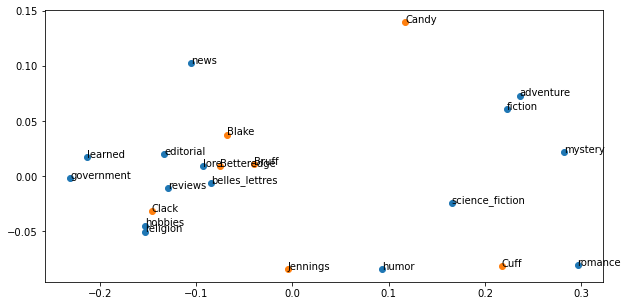

{'Betteredge': 'lore', 'Clack': 'hobbies', 'Bruff': 'belles_lettres', 'Blake': 'lore', 'Jennings': 'humor', 'Cuff': 'science_fiction', 'Candy': 'fiction'}


In [72]:
brownGenres = {}
for genre in brown.categories():
    brownGenres[genre] = " ".join(brown.words(categories=genre))

tfidfVectorizer = TfidfVectorizer(min_df=1, max_features=800, use_idf=False)
brownFreq = tfidfVectorizer.fit_transform(list(brownGenres.values())).todense()
moonstoneFreq = tfidfVectorizer.fit_transform(list(moonstoneNarrators.values())).todense()

pca = sklearn.decomposition.PCA(n_components=2)
brownReduced=pca.fit_transform(brownFreq)
moonstoneReduced=pca.fit_transform(moonstoneFreq)

brown_df = pd.DataFrame(brownReduced, columns=['First Component', 'Second Component'], index=list(brownGenres.keys()))
moonstone_df = pd.DataFrame(moonstoneReduced, columns=['First Component', 'Second Component'], index=list(moonstoneNarrators.keys()))

moonstoneGenres = {}
for narrator in moonstoneNarrators:
    closest = None
    closest_dist = np.inf
    gx, gy = moonstone_df.loc[narrator]
    for genre in brownGenres:    
        bx, by = brown_df.loc[genre]
        dist = ((gy - by) ** 2 + (gx - bx) ** 2) ** 1/2
        if dist < closest_dist:
            closest = genre
            closest_dist = dist
            
    moonstoneGenres[narrator] = closest
moonstoneGenres

plt.scatter(brown_df["First Component"], brown_df["Second Component"])
plt.scatter(moonstone_df["First Component"], moonstone_df["Second Component"])
for genre, points in brown_df.iterrows():
    plt.annotate(genre, points)
    
for narrator, points in moonstone_df.iterrows():
    plt.annotate(narrator, points)
    
   
plt.show()
print(moonstoneGenres)


It was quite difficult to create a "simple" genre categorizer, but the end result was a surprise in that it worked fairly well.  For instance, Clack’s narrative, written in a rather conversational and non-formal style, was assigned the “hobbies” category, but “religion” was also close by. Candy, with part of his narrative being disjointed, was “fiction.” Both Betteredge and Blake were “lore.” It is not a surprise that they would be in the same category, and that their narrative would be closest to storytelling. 

Bruff’s narrative was labelled as “Belles Lettres,” or  literary & artistic criticism written for aesthetic effect. This aptly describes his writing style. Less understandable was Jennings’s contribution as “humor” although rather dry humor was present.  Cuff and Candy on the plot were far away from their genres, as it seems their texts did not have diagnostic features that were easy to categorize.  The categorizer would no doubt be more accurate when using a modern American corpus. 

The error message is a reminder to obtain a more up to date matrix and does not influence the results.

### Bruff's Distinctive Words

In [73]:
##distinctive words

def counted(textString):
    lowered = textString.lower()
    tokens=nltk.word_tokenize(lowered)
    return Counter(tokens)

allCounts = {key: counted(value) for key, value in moonstoneNarrators.items()}
narratorsDF = pd.DataFrame(allCounts)
narratorsDF.sort_values(by="Bruff")

narratorsFreqDF = narratorsDF / narratorsDF.sum()
narratorsFreqDF['average'] = narratorsFreqDF.mean(axis=1)

Bruffness = narratorsFreqDF['Bruff'] - narratorsFreqDF['average']

Bruffness.sort_values(ascending=False).head(40)



of            0.006181
i             0.003991
had           0.003740
her           0.002751
was           0.002164
that          0.002119
it            0.001947
indians       0.001726
indian        0.001721
to            0.001702
in            0.001684
would         0.001563
their         0.001522
my            0.001499
they          0.001495
verinder      0.001463
which         0.001288
will          0.001225
``            0.001157
murthwaite    0.001154
first         0.001144
?             0.001086
moonstone     0.001001
be            0.000916
at            0.000893
office        0.000862
who           0.000790
money         0.000781
course        0.000775
's            0.000751
position      0.000739
chance        0.000727
so            0.000713
his           0.000691
me            0.000690
luker         0.000683
''            0.000662
think         0.000629
informed      0.000614
very          0.000568
dtype: float64

Mr. Bruff uses distinctive language, as is shown by the Genre Categorizer plot above. His narrative likely reflects the professional jargon of the era, but is notable for not having an abundance of legalese. It is likely that Collins did not want to alienate readers with legal language. A good example is given by Mr. Bruff’s statement about Lady Verinder’s will: 
    
> Let me state, then, in the fewest possible words, that Rachel Verinder had nothing but a life-interest in the property. Her   mother's excellent sense, and my long experience, had combined to relieve her of all responsibility, and to guard her from all  danger of becoming the victim in the future of some needy and unscrupulous man. Neither she, nor her husband (if she married),    could raise sixpence, either on the property in land, or on the property in money.They would have the houses in London and in  Yorkshire to live in, and they would have the handsome income—and that was all. 

This statement does use a few legal terms “life interest” as well as “property in land” and “property in money” are good examples. The statement is more notable for the use of legal reasoning using mostly everyday language. Dealing with clients would have been a specialty of a Solicitor, while legal advocacy would be the specialty Barristers were known for. The statement also contains Victorian sentiments about the capacity of women that it seems Collins did not share. However, he did have Bruff address these issues in a very brusque manner. 

The list above is his use of particular words going down in frequency. Words such as: "of" and "I" suggest he is formal when compared to the other narrators. This also explains the Belles Lettres genre. The use of the words "office" and "position" directly reference his profession. "Marriage" also appears in the list, and as we see Bruff is primarily concerned with legal issues according to his text. One may suspect by reading in between the lines that he is also concerned for Rachel’s future.  

Interestingly, Collins did not follow the advice given to him by Dickens in his novel *No Name* (1862). Dickens suggested giving the lawyer, Mr. Pendril, "some touches of comicality" (Letters, III, 282). However, Dickens kept that lawyer serious (Lonoff 154). This may simply be an executive decision regarding  a character, but it seems that as a rule, Collins held lawyers in high repute. It is possible that he wanted to preserve friendships in the legal world, or perhaps he may even have kept his option open to practice as a lawyer at some future date. 


### 3. Social Network

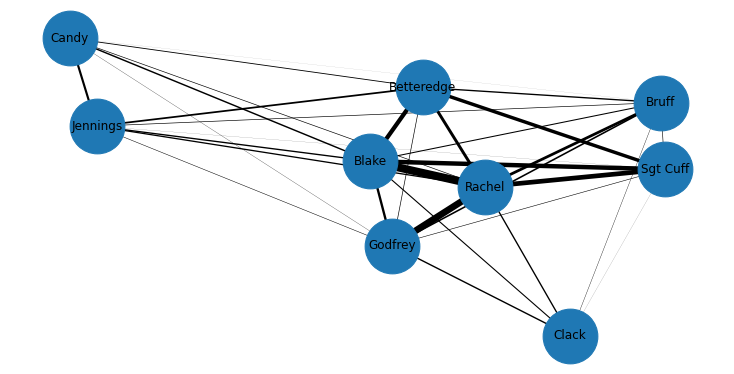

In [74]:
names = {
 "Rachel": ["Rachel", "Verinder"],
 "Betteredge": ["Betteredge", "Gabriel"],
 "Blake": ["Blake", "Franklin"],
 "Jennings": ["Jennings", "Ezra Jennings", "Ezra"],
 "Sgt Cuff": ["Sergeant", "Cuff"],
 "Bruff": ["Bruff"],
 "Candy": ["Candy"],
 "Clack": ["Clack", "Drusilla"],
 "Godfrey": ["Godfrey", "Ablewhite"]
} 

chars = list(names.keys())
charPairs = {pair: 0 for pair in list(combinations(chars,2))}

paragraphs = Moonstone.lower().split("\n\n")

for paragraph in paragraphs:
    for name1, name2 in list(combinations(chars,2)):
        for variation1 in names[name1]:
            for variation2 in names[name2]:
                if variation1.lower() in paragraph and variation2.lower() in paragraph:
                    charPairs[(name1, name2)] += 1
            
            
                
graph = networkx.Graph()
graph.add_nodes_from(chars)

for pair, weight in charPairs.items():
    if weight > 0:
        graph.add_edge(pair[0], pair[1], weight=weight)

edgeWeights = np.array([charPairs[(n1, n2)] for n1, n2 in graph.edges])
networkx.draw(graph, with_labels=True, width=edgeWeights * 0.05, node_size=3000)


It is the social relationships that might add the final touch to this investigation of Mr. Bruff’s legal language. Each node is a person (more than just narrators are considered here), and the closer nodes are to each other, the closer the relationship between characters. The latter rule seems somewhat flexible due to size limitations of the visualization. Thus, for instance, Bruff and Cuff do not appear to be close to each other. This is also expressed by the thickness of lines that join them. 

In considering Bruff, it is clear that he has a close relationship with Godfrey because he suspects him of the theft. He is also close to Blake, but he is the closest to Rachel. On the other hand, Bruff might not be seen to be “in the center of the action” in the middle of the web. He is not so much an outsider as Candy, Jennings, or Clack, but he is certainly not at the core like Betteredge, Blake, Rachel and Godfrey. Cuff was, briefly, in a tight web with the others, but Cuff lost his professional reserve and made a judgement too soon. 


### CONCLUSION
> “Mr. Bruff, you have no more imagination than a cow!”
> “A cow is a very useful animal, Mr. Blake,” said the lawyer.”

The quote above might follow the common trope of emphasizing how boring the law is. However, it seems Collins is extolling Mr. Bruff. Sgt Cuff, the likely hero of the novel when it opened, flamed out because of an abundance of “imagination.” He seemed was too eager to “put the cuffs” on a suspect and solve the case. In contrast, the methodical lawyer helped solve the case in cooperation with others. There was no single hero detective in the book.  Bruff showed his legal skill not in the legal language he used (he used some specific words, but they were very general), but in his precise language that reflected a high literary style. It seems likely that Collins wanted to take attention away from the crime and the process of finding the culprits to concentrate on the real focus of the book. Franklin Blake cleared his name and married his true love, Rachel Verinder, after he finds the real culprit of the crime, which turned out to be himself. Rachel was also a winner. She eluded marriage with the evil Ablewhite, in no small part due to the observations of Mr. Bruff. 


### Works Cited
-	Ashley, Robert P. “Wilkie Collins and the Detective Story.” *Nineteenth-Century Fiction *, vol. 6, no. 1, Jun., 1951, pp. 47-60.
-	Booth, Bradford A. “Wilkie Collins and the Art of Fiction.” *Nineteenth-Century Fiction*, vol. 6, no. 2, Sept., 1951, pp. 131-143.
-	Finley, Matthew. “Hearsay Evidence: Legal Discourse, Circumstantiality, and *The Woman in White*.” *Global Tides*, vol. 10, 2016, pp. 1-10. https://digitalcommons.pepperdine.edu/globaltides/vol10/iss1/1.
-	Lonoff, Sue. “Charles Dickens and Wilkie Collins.” *Nineteenth-Century Fiction*, vol. 35, no. 2, Sept., 1980, pp. 150-170.
-	López-Escobedo, Fernanda, Carlos-Francisco Méndez-Cruz,  Gerardo Sierra,  and Julián Solórzano-Soto.“Analysis of Stylometric Variables in Long and Short Texts.” *Procedia - Social and Behavioral Sciences*, vol. 95, 2013, pp. 604-611. https://doi.org/10.1016/j.sbspro.2013.10.688.
-	Maceachen, Dougald B. “Wilkie Collins and British Law.” *Nineteenth-Century Fiction*, vol. 5, no. 2. Sept., 1950, pp. 121-139.
-	Miller D. A. “From Roman Policier to Roman-Police: Wilkie Collins's *The Moonstone*.” *NOVEL: A Forum on Fiction*, vol. 13, no. 2, winter, 1980, pp. 153-170.
